In [67]:
import pandas as pd
import sys
from matplotlib import pyplot as plt

In [63]:
%matplotlib inline


In [6]:
import seaborn as sns


In [15]:
df=pd.read_csv('/home/raza/Downloads/Pokemon.csv',index_col=0,encoding = 'unicode_escape')

In [16]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


In [17]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


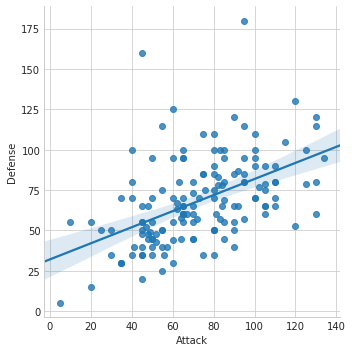

In [68]:
## lmplot is used to plot Scatter Plot but it isn't purely a scatter plot .
sns.lmplot(x='Attack',y='Defense',data=df)

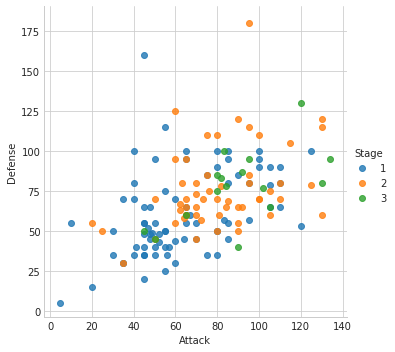

In [69]:
## To make it look better we remove regression line and colors by evolution_stage
sns.lmplot(x='Attack',y='Defense',data=df,fit_reg=False,hue='Stage')

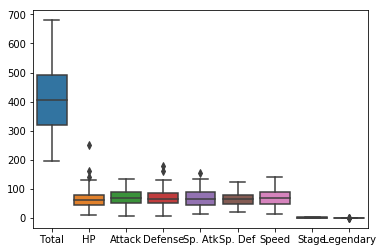

In [22]:
sns.boxplot(data=df)

In [23]:
## To remove unnecessary column's that are appearing in boxplot
new_df=df.drop(['Total','Stage','Legendary'],axis=1)

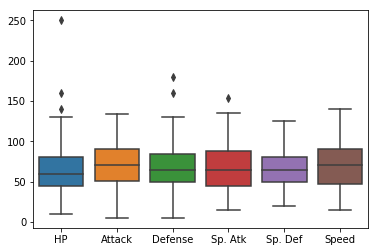

In [24]:
sns.boxplot(data=new_df)

In [59]:
## ViolinPlot are similar to box plot but are easy to understand 
## To define custom colors we can create a list and pass as an palette
## by default color is darkgrid in Violin Plot so making it whitegrid
sns.set_style('whitegrid')
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

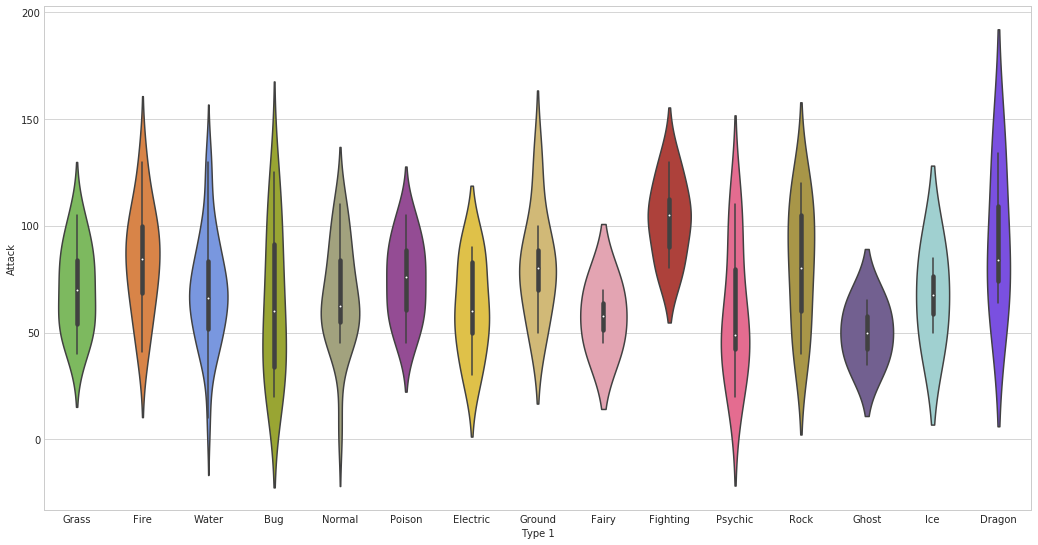

In [74]:
## Using matplotlib pyplot we can increase the size of figure
fig,ax=plt.subplots()
fig.set_size_inches(17.7,9.27)
sns.violinplot(x='Type 1',y='Attack',data=df,ax=ax,palette=pkmn_type_colors)

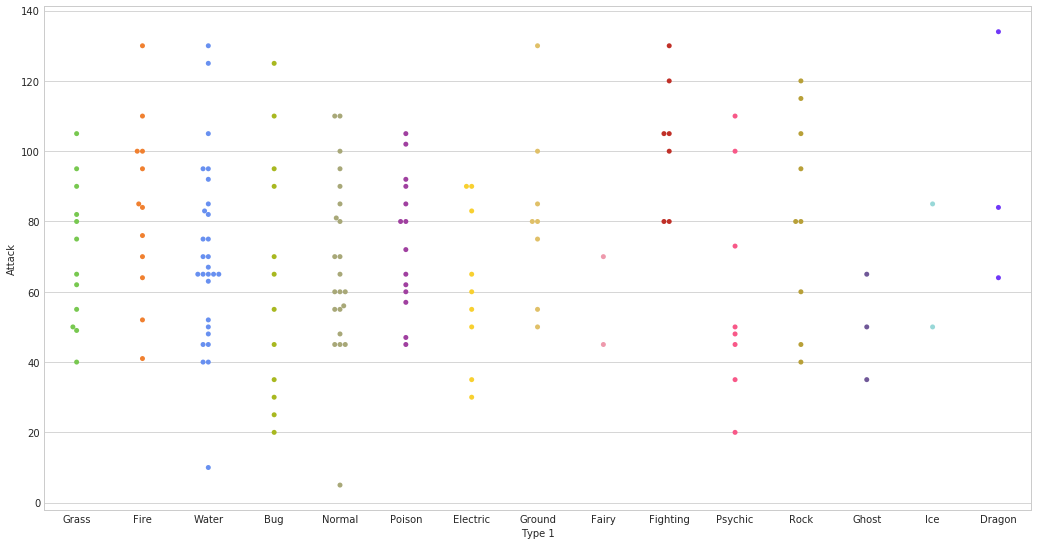

In [75]:
## Swarm Plot
fig,ax=plt.subplots()
fig.set_size_inches(17.7,9.27)
sns.swarmplot(x='Type 1',y='Attack',data=df,palette=pkmn_type_colors,ax=ax)

Text(0.5,1,'Attack by Pokemon Type')

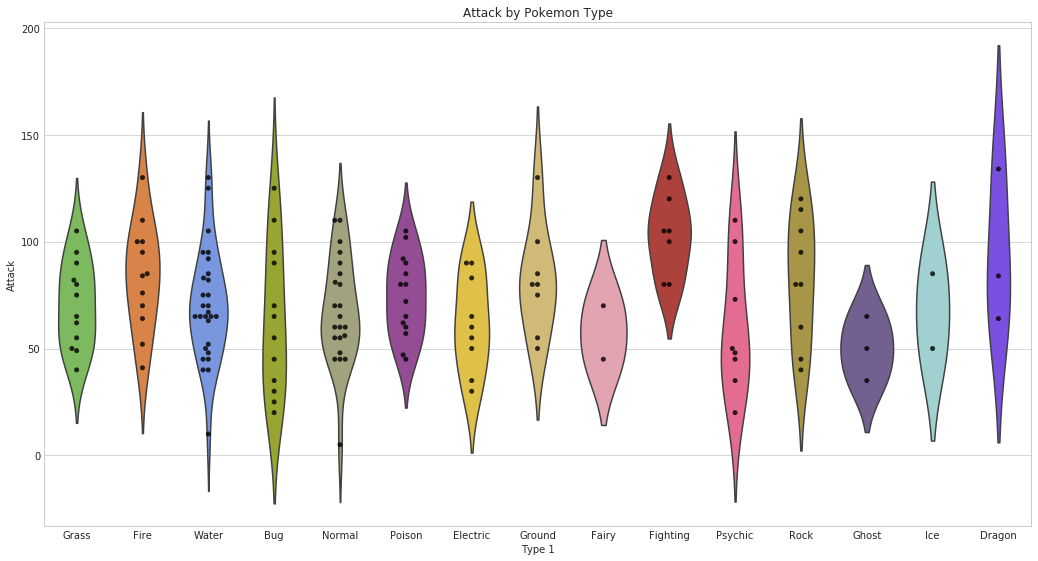

In [78]:
fig,ax=plt.subplots()
fig.set_size_inches(17.7,9.27)
sns.violinplot(x='Type 1',y='Attack',data=df,inner=None,##inner is used to remove bars inside violinplot
               palette=pkmn_type_colors)

sns.swarmplot(x='Type 1',
             y='Attack',
             data=df,
             color='k',## to make color black of dots
             alpha=0.8)## to make transparent
plt.title('Attack by Pokemon Type')

In [79]:
## Combining many columns into one
melted_df=pd.melt(new_df,id_vars=['Name','Type 1','Type 2'],var_name='Ability')

In [81]:
melted_df.head()

,Name,Type 1,Type 2,Ability,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


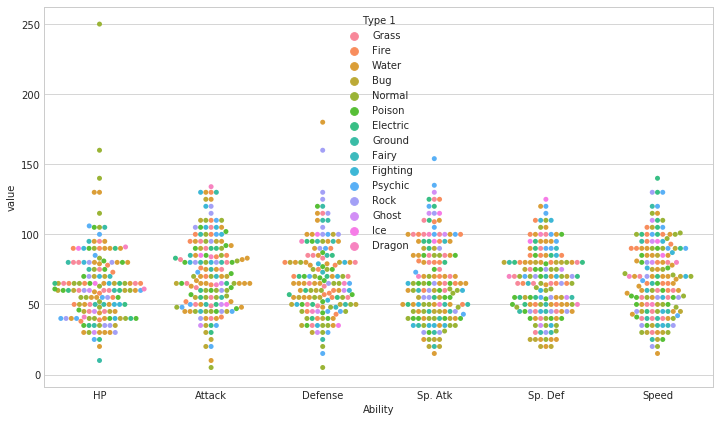

In [88]:
fig,ax=plt.subplots()
fig.set_size_inches(12,7)
sns.swarmplot(x='Ability',y='value',data=melted_df,hue='Type 1')

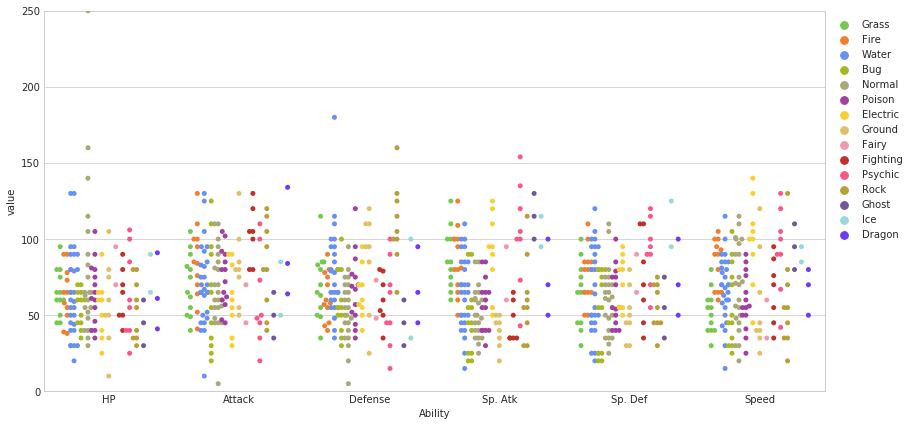

In [94]:
## Making it look more understandable
fig,ax=plt.subplots()
fig.set_size_inches(14,7)
sns.swarmplot(x='Ability',y='value',data=melted_df,hue='Type 1',dodge=True,palette=pkmn_type_colors)
plt.ylim(0,250)
plt.legend(bbox_to_anchor=(1, 1), loc=2) ## To place legend box outside the plot

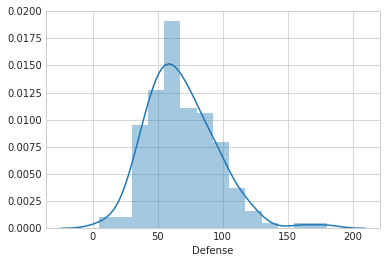

In [99]:
sns.distplot(df.Defense)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

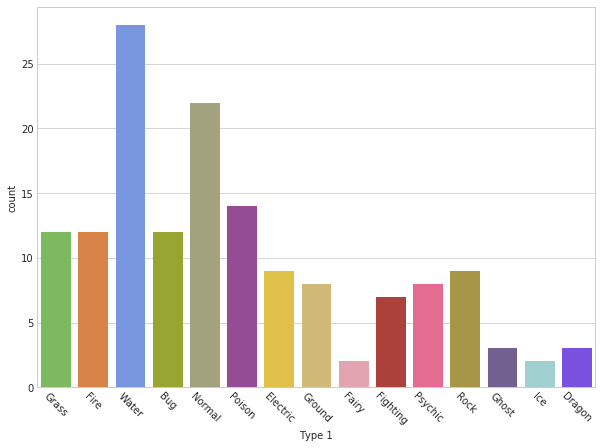

In [108]:
plt.figure(figsize=(10,7))
sns.countplot(x='Type 1',data=df,palette=pkmn_type_colors)
plt.xticks(rotation=-45)

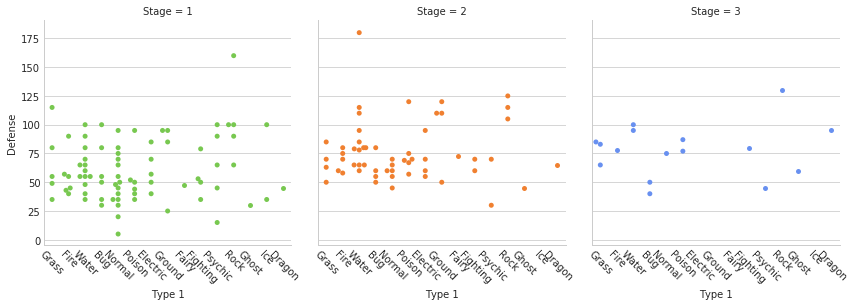

In [113]:
my_plot=sns.factorplot(x='Type 1',y='Defense',data=df,hue='Stage',col='Stage',palette=pkmn_type_colors,kind='swarm')
my_plot.set_xticklabels(rotation=-45)

(0, 170)

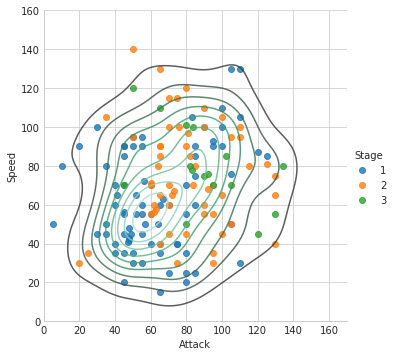

In [129]:
plt.figure(figsize=(8,4))
sns.lmplot(x='Attack',y='Speed',data=df,fit_reg=False,hue='Stage')
sns.kdeplot(df.Attack,df.Speed,alpha=0.8)
plt.ylim(0,160)
plt.xlim(0,170) # Used to limit x and y co-ordinates